<a href="https://colab.research.google.com/github/GitTanish/Ml-Projects/blob/main/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install --upgrade pip
!pip install tensorflow
! pip install scikit-learn
! pip install streamlit
!pip install librosa
! pip install numpy
! pip install pandas
! pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 145.6 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.18.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

#### Training Image Preprocessing

In [4]:
import kagglehub
import os

# Define the target folder
target_folder = "/content/Plant_disease_detection"

# Ensure the folder exists
os.makedirs(target_folder, exist_ok=True)

# Download and extract dataset into the specified folder
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


100%|██████████| 2.70G/2.70G [00:21<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [5]:
import shutil

# Source and destination paths
source_path = "/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"
destination_path = "/content/Plant_disease_detection"

# Copy everything from source to destination
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"Dataset moved to: {destination_path}")


Dataset moved to: /content/Plant_disease_detection


In [41]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred", # go inside the train folder and whatever is the name of the directory select it
    label_mode="categorical", # because it's a multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


#### Validation Image PreProcessing

In [42]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred", # go inside the train folder and whatever is the name of the directory select it
    label_mode="categorical", # because it's a multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [43]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [44]:
for x, y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Building Model

In [45]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [46]:
model = Sequential()

In [47]:
# Building Convolution layer

In [48]:
# 1st layer
model.add(Conv2D(filters=32,kernel_size=3, padding = 'same', activation='relu', input_shape=[128,128,3])) # basically image box
model.add(Conv2D(filters=32,kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# 2nd Layer
model.add(Conv2D(filters=64,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [50]:
# 3rd Layer
model.add(Conv2D(filters=128,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=128,kernel_size=3,  activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [51]:
# 4th layer
model.add(Conv2D(filters=256,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=256,kernel_size=3, activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [52]:
# 5th layer
model.add(Conv2D(filters=512,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=512,kernel_size=3, activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [53]:
model.add(Dropout(0.25))

In [54]:
# Flattening
model.add(Flatten())

In [55]:
# Dense layer
model.add(Dense(units=1500, activation='relu')) # units = neuron

In [56]:
model.add(Dropout(0.40))

In [57]:
# output :- prediction by each class
model.add(Dense(units=38, activation='softmax')) # softmax cause output by each class
                                                 # so select that class which is having maximum probability

### Compiling the model

In [58]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for multiclasses

In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [60]:
training_history=model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 69ms/step - accuracy: 0.4014 - loss: 2.1463 - val_accuracy: 0.8581 - val_loss: 0.4682
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 146s 66ms/step - accuracy: 0.8372 - loss: 0.5177 - val_accuracy: 0.8967 - val_loss: 0.3193
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 190s 61ms/step - accuracy: 0.9005 - loss: 0.3086 - val_accuracy: 0.9217 - val_loss: 0.2458
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9364 - loss: 0.1982 - val_accuracy: 0.9464 - val_loss: 0.1632
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9517 - loss: 0.1441 - val_accuracy: 0.9337 - val_loss: 0.2191
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 65ms/step - accuracy: 0.9619 - loss: 0.1138 - val_accuracy: 0.9496 - val_loss: 0.1592
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - accuracy: 0.9695 - loss: 0.0907 - val_accuracy: 0.9577 - val_loss: 0.1461
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 

### Model Evaluation

In [61]:
### Model evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9821 - loss: 0.0551


In [62]:
print(train_loss,train_acc)

0.05173078924417496 0.9835265874862671


In [64]:
val_loss,train_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9512 - loss: 0.1778


### Saving model

In [66]:
model.save('trained_model.keras') # saving in keras's own native format as h5 is considered as legacy and .keras is more robust as compared

In [ ]:
#keras.models.load_model('trained_model.keras') ## to call

In [67]:
training_history.history

{'accuracy': [0.6012803316116333,
  0.8573582768440247,
  0.9108613729476929,
  0.9400099515914917,
  0.9545344710350037,
  0.9637100696563721,
  0.9719183444976807,
  0.9755316972732544,
  0.9809659123420715,
  0.9823458194732666],
 'loss': [1.3606775999069214,
  0.44970816373825073,
  0.275362104177475,
  0.18710514903068542,
  0.1351822167634964,
  0.10856025665998459,
  0.08582574129104614,
  0.07540912926197052,
  0.05742998421192169,
  0.056108664721250534],
 'val_accuracy': [0.858069658279419,
  0.8966537714004517,
  0.9216936230659485,
  0.9463919997215271,
  0.9337013363838196,
  0.9495788812637329,
  0.9577168226242065,
  0.9550421237945557,
  0.959822416305542,
  0.9521966576576233],
 'val_loss': [0.4682106375694275,
  0.319266676902771,
  0.24576371908187866,
  0.16320671141147614,
  0.21905381977558136,
  0.1592332273721695,
  0.14606806635856628,
  0.14763161540031433,
  0.1288546919822693,
  0.1729315221309662]}

### Accuracy Visualization

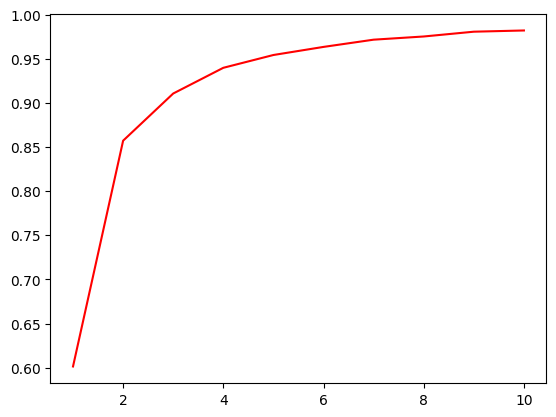

In [70]:
# for train accuracy
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.show()

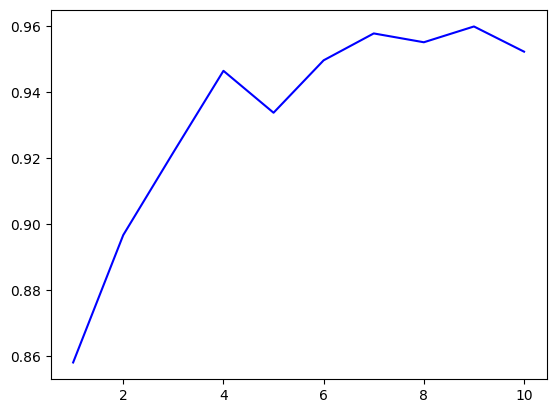

In [72]:
# for value accuracy
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Value Accuracy')
plt.show()

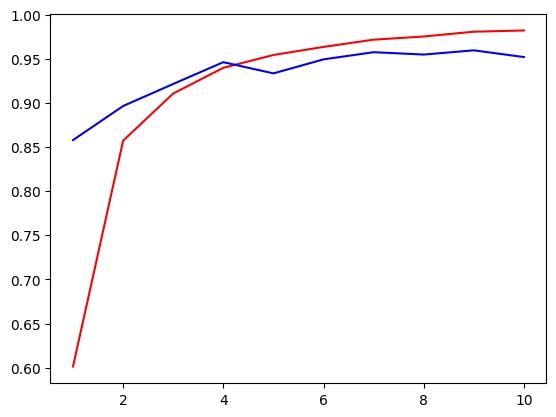

In [73]:
# Comparison
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Value Accuracy')

plt.show()

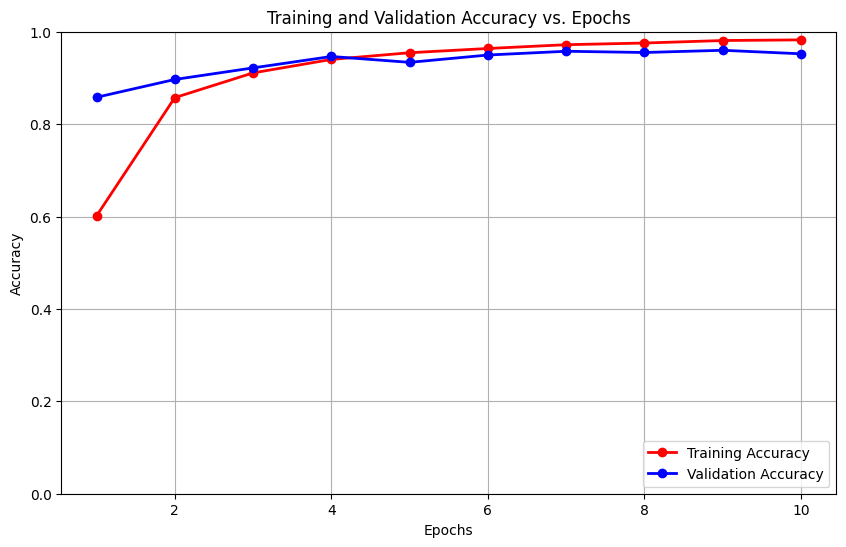

In [74]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 11)]

plt.figure(figsize=(10, 6))  # Adjust plot size
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy', linewidth=2, marker='o')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy', linewidth=2, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.legend(loc='lower right') # change legend location
plt.grid(True)
plt.ylim(0,1) # set y axis limits.

plt.show()